In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"F:\LPU\Data\Handling null\car-sales-extended-missing-data.csv")

In [3]:
df = pd.DataFrame(data)
df.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [4]:
df.isnull().any()

Make             True
Colour           True
Odometer (KM)    True
Doors            True
Price            True
dtype: bool

In [5]:
df.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [10]:
df2 = df['Make'].fillna(value="Unidentified")
df2

0             Honda
1               BMW
2             Honda
3            Toyota
4            Nissan
           ...     
995          Toyota
996    Unidentified
997          Nissan
998           Honda
999          Toyota
Name: Make, Length: 1000, dtype: object

In [12]:
df3 = df.fillna(method="pad")
df3.isnull().any()

Make             False
Colour           False
Odometer (KM)    False
Doors            False
Price            False
dtype: bool

In [13]:
df4 = df.fillna(method='bfill')
df4 

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,Nissan,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [14]:
df5 = df.fillna(method='pad',axis=1)
df5

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


C:\Users\SIDDHARTH\AppData\Local\Temp\ipykernel_14480\844756529.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True)


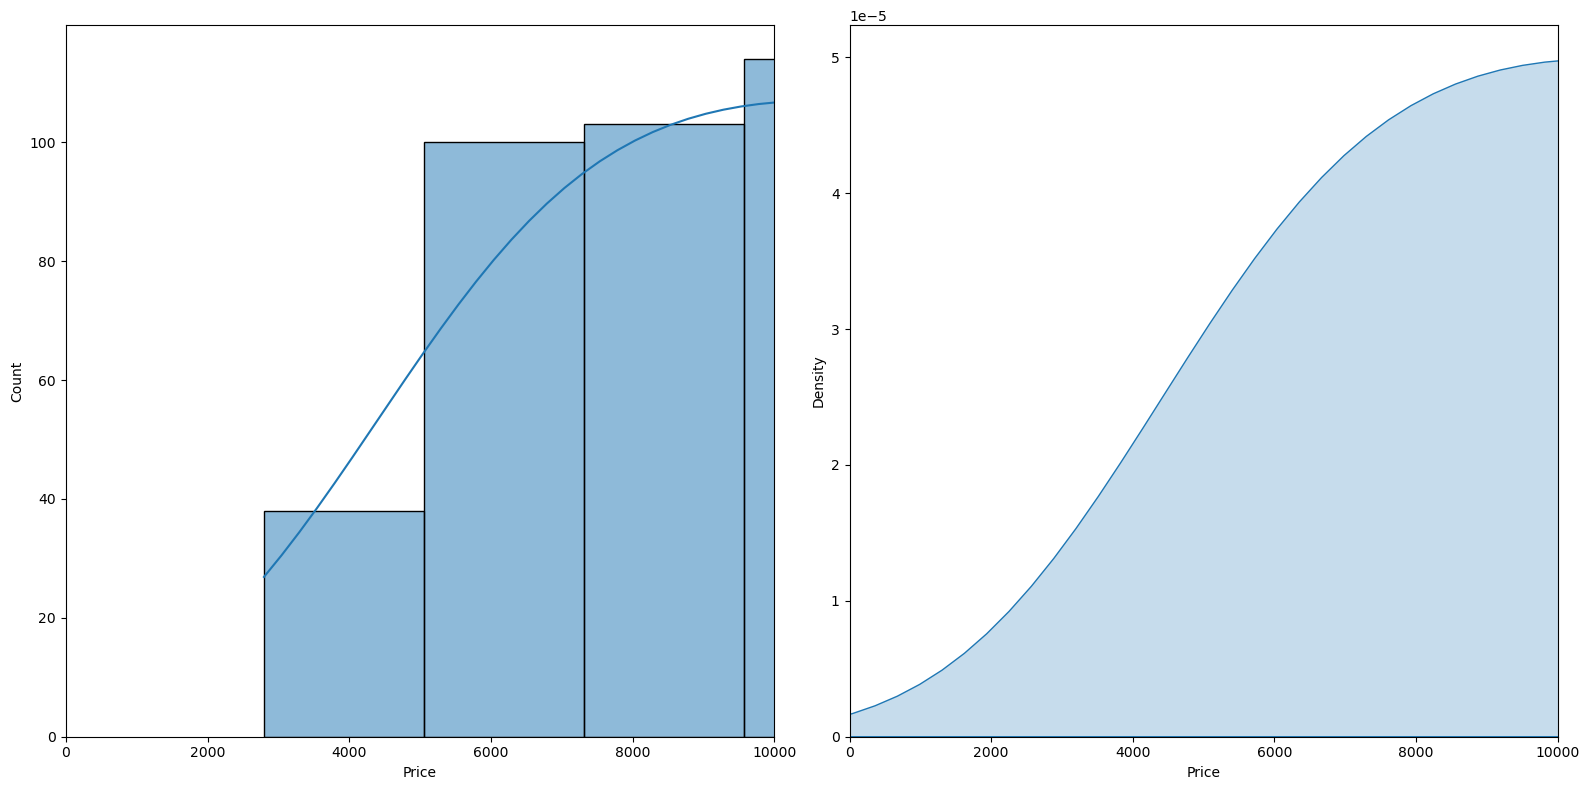

In [25]:
import seaborn as sns

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True)
plt.xlim(0, 10000)


plt.subplot(1, 2, 2)
sns.kdeplot(df['Price'], shade=True)
plt.xlim(0, 10000)

plt.tight_layout()
plt.show()

In [24]:
df7 = df['Price'].fillna(value=df['Price'].median())
print(df7)

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 1000, dtype: float64


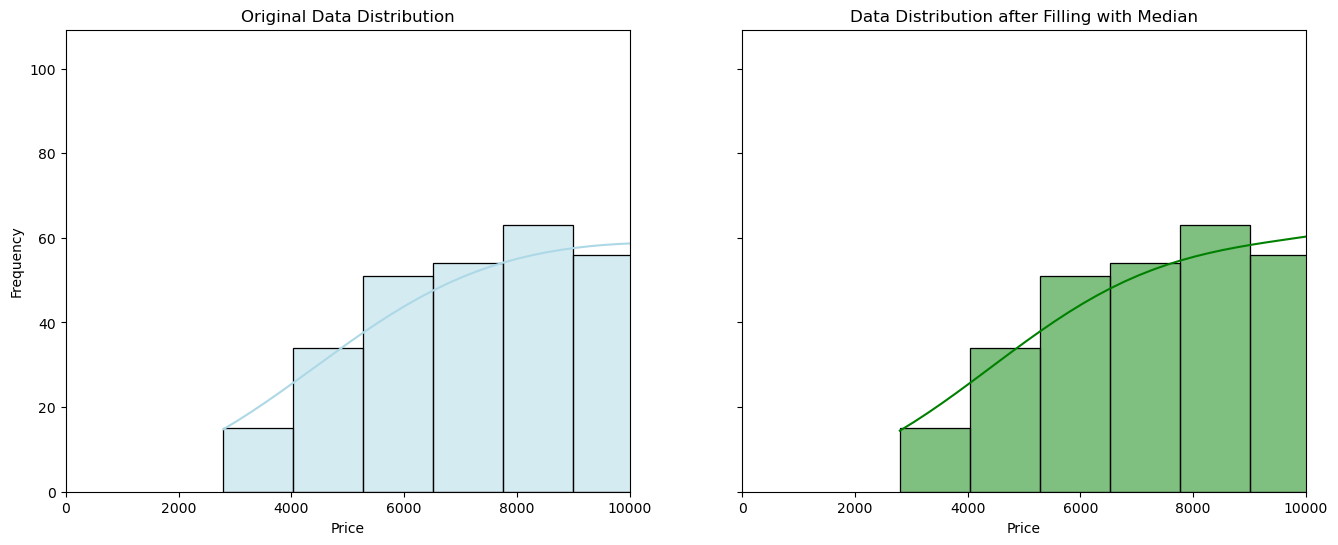

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.histplot(df['Price'], kde=True, color='lightblue', bins=40, ax=axs[0])
axs[0].set_title("Original Data Distribution")
axs[0].set_xlabel("Price")
axs[0].set_ylabel("Frequency")
axs[0].set_xlim(0, 10000)

sns.histplot(df7, kde=True, color='green', bins=40, ax=axs[1])
axs[1].set_title("Data Distribution after Filling with Median")
axs[1].set_xlabel("Price")
axs[1].set_xlim(0, 10000)

plt.xlim(0, 10000)

plt.show()